In [22]:
# 12/04/2021
# m vs mdot

In [23]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
sys.path.append('../src/')
os.chdir('../src/')
import populations
from ulxlc import ULXLC
import L_samp

In [25]:
df = populations.startrack_v2_mt_1_all()
pop = populations.Population(df)

In [26]:
def plot_m_mdot(df, ax, split_bh_ns=False, **kwargs):
    if split_bh_ns:
        df_ns, df_bh = pop.split_ns_bh(df)
        ax.scatter(df_ns['M_a'], df_ns['mdot_ratio'], label='NS', color='blue',  **kwargs)
        ax.scatter(df_bh['M_a'], df_bh['mdot_ratio'], label='BH', color='black', **kwargs)
    else:
        ax.scatter(df['M_a'], df['mdot_ratio'], **kwargs)
    
    ax.set_xlabel(r'$M_{a} (M_{\odot})$')
    ax.set_ylabel(r'$\dot{m}_{0}$')

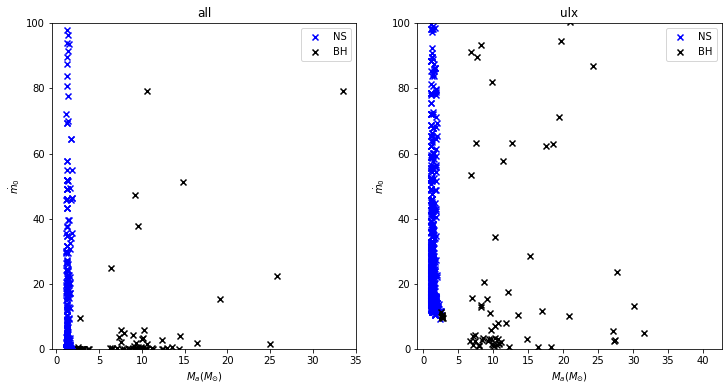

In [27]:
fig, ax = plt.subplots(1,2,figsize=(12,6))


for i, subset in enumerate(['all', 'ulx']):
    samp = pop.sample_systems(0.1, 1000, subset=subset, return_df=True)    
    ax[i].set_title(subset)
    plot_m_mdot(samp, ax[i], split_bh_ns=True, marker='x')
    ax[i].set_ylim(0,100)
    ax[i].legend()
    
plt.savefig('../reports/figures/m_mdot_ns_bh.png')
plt.savefig('../reports/figures/m_mdot_ns_bh.pdf')

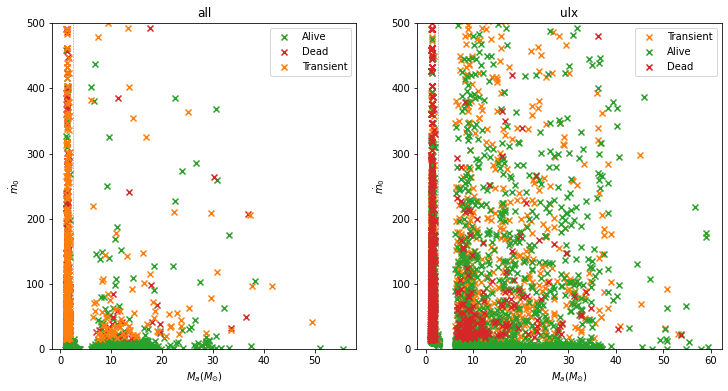

In [39]:
ulxlc = ULXLC()
fig, ax = plt.subplots(1,2,figsize=(12,6))

N_sys = 10000

d = {0.0 : 'Dead',
     1.0 : 'Transient',
     2.0 : 'Alive',
     3.0 : None}

colors = {0.0 : 'C3',
          1.0 : 'C1',
          2.0 : 'C2',
          3.0 : 'C2'}

for i, subset in enumerate(['all', 'ulx']):
    samp = pop.sample_systems(0.3, N_sys, subset=subset, return_df=True)
    
    samp['inclination'] = np.random.randint(0, 91, size=N_sys)        # Random Inclination
    samp['dincl']       = np.random.randint(0, 46, size=N_sys)        # Random precessional angle
    Lx_prec, lc_classification = L_samp.calc_Lx_prec(samp, ulxlc, N_sys)
    samp['lc_classification'] = lc_classification
    
    for c in samp['lc_classification'].unique():
        sub = samp[samp['lc_classification'] == c]
        plot_m_mdot(sub, ax[i], split_bh_ns=False, marker='x', c=colors[c], label=d[c])
    ax[i].set_title(subset)
    ax[i].axvline(2.5, linestyle='--', color='grey', linewidth=0.5)
    ax[i].set_ylim(0,500)
    ax[i].legend()
    
plt.savefig('../reports/figures/m_mdot_ADT_BH_03.png')
plt.savefig('../reports/figures/m_mdot_ADT_BH_03.pdf')

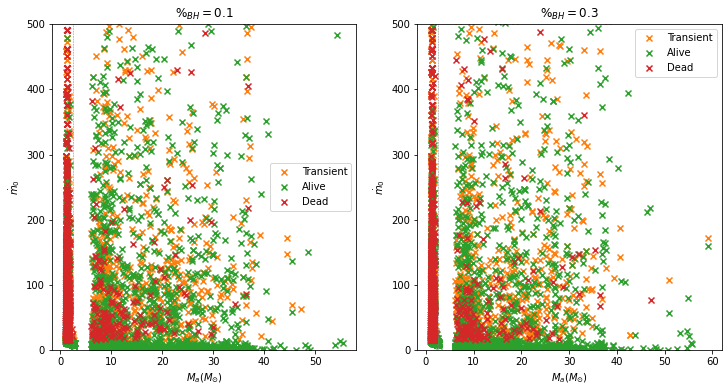

In [40]:
ulxlc = ULXLC()
fig, ax = plt.subplots(1,2,figsize=(12,6))

N_sys = 10000

d = {0.0 : 'Dead',
     1.0 : 'Transient',
     2.0 : 'Alive',
     3.0 : None}

colors = {0.0 : 'C3',
     1.0 : 'C1',
     2.0 : 'C2',
     3.0 : 'C2'}

for i, bh in enumerate([0.1, 0.3]):
    samp = pop.sample_systems(0.3, N_sys, subset=subset, return_df=True)
    
    samp['inclination'] = np.random.randint(0, 91, size=N_sys)        # Random Inclination
    samp['dincl']       = np.random.randint(0, 46, size=N_sys)        # Random precessional angle
    Lx_prec, lc_classification = L_samp.calc_Lx_prec(samp, ulxlc, N_sys)
    samp['lc_classification'] = lc_classification
    
    for c in samp['lc_classification'].unique():
        sub = samp[samp['lc_classification'] == c]
        plot_m_mdot(sub, ax[i], split_bh_ns=False, marker='x', c=colors[c], label=d[c])
    ax[i].set_title(f'$\%_{{BH}} = ${bh}')
    ax[i].axvline(2.5, linestyle='--', color='grey', linewidth=0.5)
    ax[i].set_ylim(0,500)
    ax[i].legend()
plt.savefig('../reports/figures/m_mdot_ADT_BH_RATIO.png')
plt.savefig('../reports/figures/m_mdot_ADT_BH_RATIO.pdf')

In [71]:
samp = pop.sample_systems(0.5, N_sys, subset='ulx', return_df=True)
samp['inclination'] = np.random.randint(0, 91, size=N_sys)        # Random Inclination
samp['dincl']       = np.random.randint(0, 46, size=N_sys)        # Random precessional angle
Lx_prec, lc_classification = L_samp.calc_Lx_prec(samp, ulxlc, N_sys)
samp['lc_classification'] = lc_classification

In [55]:
samp[['K_a', 'M_a', 'M_b', 'mdot_ratio', 'lc_classification']].to_csv('../data/N_sys-10000,bh_ratio=0.1.txt',index=False, sep='\t')

In [99]:
pop.df_ulx['dt'].describe()

count    4.624270e+06
mean     7.276553e-03
std      1.692519e-01
min      1.000000e-11
25%      7.300000e-06
50%      1.600000e-04
75%      9.400000e-04
max      3.100000e+01
Name: dt, dtype: float64

In [101]:
samp[['M_a','mdot_ratio', 'b', 'theta_half_deg', 'Lx_iso', 'Lx1', 'lc_classification']]

,M_a,mdot_ratio,b,theta_half_deg,Lx_iso,Lx1,lc_classification
7528032,25.67,28.330410,0.090953,24.626019,1.449615e+40,1.593806e+41,0.0
3460862,8.48,2872.947419,0.003200,4.584886,9.880915e+39,3.087786e+42,2.0
3548850,9.60,356.045374,0.003200,4.584886,8.580073e+39,2.681273e+42,1.0
3879562,8.51,7.691157,1.000000,90.000000,3.363231e+39,3.363231e+39,3.0
7421576,10.57,7.568267,1.000000,90.000000,4.155229e+39,4.155229e+39,3.0
...,...,...,...,...,...,...,...
1344057,1.13,13.515110,0.399654,53.105288,5.293994e+38,1.324646e+39,3.0
7888764,1.12,48.699215,0.030781,14.252709,7.113525e+38,2.311032e+40,1.0
1253578,1.26,98.119900,0.007582,7.060196,9.150180e+38,1.206760e+41,2.0
4810710,1.11,104.827620,0.006643,6.607909,8.156294e+38,1.227783e+41,1.0


In [ ]:
samp['lc_classification']